<a href="https://colab.research.google.com/github/Jhonfiliusgultom3/Tugas-Quiz_JhonFiliusGultom_IlliyaRosida/blob/main/Tugas_Quiz_Deep_Learning_Jhon_Filius_Gultom_dan_Illiya_Rosida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS/QUIZ MATA KULIAH DEEP LEARNING KELAS A

Nama Kelompok

1. Jhon Filius Gultom (210411100019)
2. Illiya Rosida (210411100051)

# 1. buat custom dataset untuk melakukan klasififkasi jenis sepatu: sepatu formal, sepatu santai, dan sepatu olahraga. tiap kelas masing masing minimal 100 data.

Proses Pengambilan Data : Data image sepatu diambill dari sumber Kaggle Kemudian data tersebut di input didalam Google Drive, Selanjutnya data di panggil untuk di proses.

Banyak Data yaitu
1. Data Training 746 image, dimana terdiri dari 3 clas yaitu, sepatu Formal, Sepatu Santai dan sepatu Olahraga.
2. Data Validasi 150 Image, dimana terdiri dari 3 clas yaitu, sepatu Formal, Sepatu Santai dan sepatu Olahraga.
3. Data Untuk Prediksi yaitu 9 image random yaitu data yang tidak pernah digunakan.

Link Data Training : https://drive.google.com/drive/folders/16WpmkgZbJpA7MhhLpbhfPnMHwys6WW98?usp=drive_link

Link Data Validasi : https://drive.google.com/drive/folders/1D4YfxNsFvtXJSvsAMFUZfnZPs2axSutm?usp=sharing

Link Data Untuk Prediksi : https://drive.google.com/drive/folders/1jwG91LyXirCHERNsxjiTHCGerXwSNyt6?usp=sharing


# 2. Load dataset tanpa menggunakan augmentasi

In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications import VGG16
from keras.models import Model
from keras.optimizers import Adam

# 1. Memuat Dataset Tanpa Augmentasi
train_dir = '/content/drive/MyDrive/Dataset_train'
val_dir = '/content/drive/MyDrive/Dataset_val'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=42)  # Menambahkan seed untuk mengatur urutan data

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=42)  # Menambahkan seed untuk mengatur urutan data


Found 746 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


## Mencetak Kelas data yang digunakan

In [17]:
# Mencetak kelas-kelas yang terdeteksi oleh generator data latih
print("Kelas-kelas data latih:", train_generator.class_indices)

# Mencetak kelas-kelas yang terdeteksi oleh generator data validasi
print("Kelas-kelas data validasi:", val_generator.class_indices)


Kelas-kelas data latih: {'Sepatu_Formal': 0, 'Sepatu_Olahraga': 1, 'Sepatu_Santai': 2}
Kelas-kelas data validasi: {'Sepatu_Formal_Validation': 0, 'Sepatu_Olahraga_Validation': 1, 'Sepatu_Santai_Validation': 2}


# 3. Buat model VGG16 (from scratch,) menggunakan KERAS functional API lalu lakukan training

In [18]:
# Load model VGG16 tanpa lapisan output (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze semua layer yang sudah diload
for layer in base_model.layers:
    layer.trainable = False

# Buat lapisan output
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # 3 kelas: sepatu santai, sepatu olahraga, sepatu formal

# Gabungkan model dasar VGG16 dengan lapisan output baru
model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# Training Data/ Menguji Data

In [19]:
# Train the model
history = model.fit(train_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    validation_steps=len(val_generator))


Epoch 1/5
24/24 [==============================] - 621s 26s/step - loss: 3.5266 - accuracy: 0.5013 - val_loss: 0.7994 - val_accuracy: 0.7000
Epoch 2/5
24/24 [==============================] - 617s 26s/step - loss: 0.4174 - accuracy: 0.8432 - val_loss: 0.4073 - val_accuracy: 0.8600
Epoch 3/5
24/24 [==============================] - 561s 23s/step - loss: 0.1788 - accuracy: 0.9544 - val_loss: 0.3657 - val_accuracy: 0.8667
Epoch 4/5
24/24 [==============================] - 610s 26s/step - loss: 0.1030 - accuracy: 0.9866 - val_loss: 0.4092 - val_accuracy: 0.8400
Epoch 5/5
24/24 [==============================] - 607s 26s/step - loss: 0.0597 - accuracy: 0.9946 - val_loss: 0.3634 - val_accuracy: 0.8400


# 4. Plot loss dan accuracy dari training dan validasi

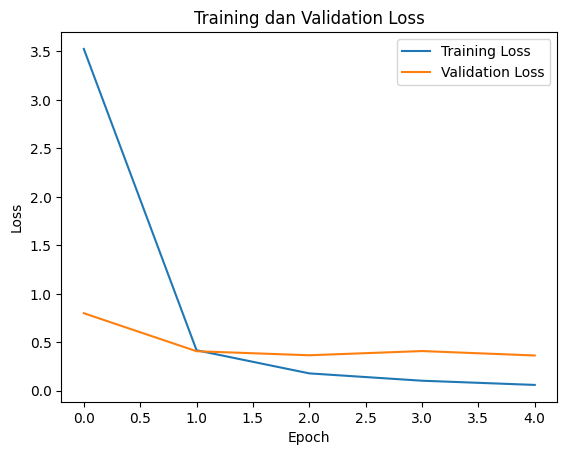

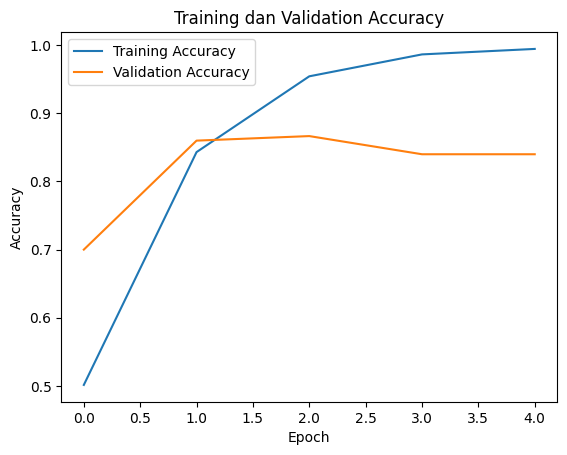

In [25]:
# Plot training dan validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training dan Validation Loss')
plt.legend()
plt.show()

# Plot training dan validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training dan Validation Accuracy')
plt.legend()
plt.show()


# 5. Melakukan prediiksi mengunakan data lain sebanyak 9 data (selain data training dan validasi). lalu plot hasilnya menggunakan subplot atau subfigure ukuran 3x3

1/1 [==============================] - 5s 5s/step


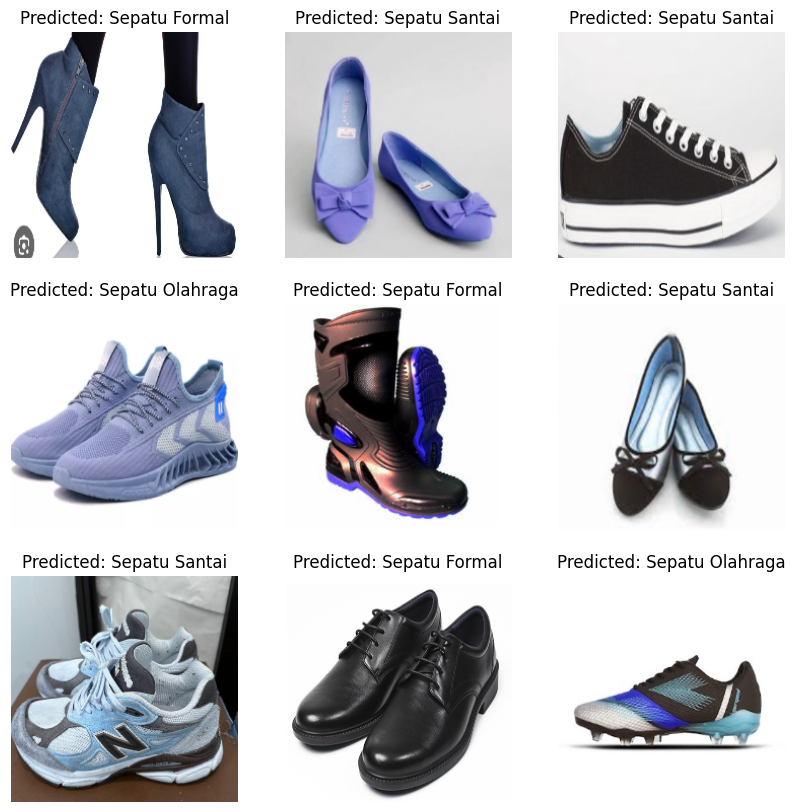

In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisikan direktori tempat data untuk prediksi
prediksi_dir = '/content/drive/MyDrive/Data_Untuk Prediksi'

# Inisialisasi list untuk menyimpan gambar-gambar yang akan diprediksi
prediksi_images = []

# Memuat gambar-gambar dari direktori prediksi
for filename in os.listdir(prediksi_dir):
    # Baca gambar
    image = cv2.imread(os.path.join(prediksi_dir, filename))
    # Ubah ukuran gambar menjadi (224, 224) yang diharapkan oleh model VGG16
    image = cv2.resize(image, (224, 224))
    # Normalisasi data dengan mereskalasi nilai piksel menjadi rentang [0, 1]
    image = image.astype('float32') / 255.0
    # Tambahkan gambar yang telah diproses ke dalam list
    prediksi_images.append(image)

# Konversi list gambar menjadi array numpy
prediksi_data = np.array(prediksi_images)

# Lakukan prediksi menggunakan model
predicted_classes = model.predict(prediksi_data)

# Plot hasil prediksi dalam subplot 3x3
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(prediksi_data[i])
    # Tentukan kelas hasil prediksi
    predicted_class = np.argmax(predicted_classes[i])
    if predicted_class == 0:
        class_label = 'Sepatu Formal'
    elif predicted_class == 1:
        class_label = 'Sepatu Olahraga'
    else:
        class_label = 'Sepatu Santai'
    plt.title("Predicted: {}".format(class_label))
    plt.axis('off')
plt.show()
